# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-01-05 23:00:13,721 | INFO : Running online!
2023-01-05 23:00:13,764 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-01-05 23:00:14,685 | INFO : 2023-01-05_23-00-14-685816
2023-01-05 23:00:14,799 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-01-05 23:00:15,165 | INFO : 2023-01-05_23-00-15-165368
2023-01-05 23:00:15,263 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-01-05 23:00:15,618 | INFO : 2023-01-05_23-00-15-618239
2023-01-05 23:00:15,709 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-01-05 23:00:16,070 | INFO : 2023-01-05_23-00-16-070553
2023-01-05 23:00:16,165 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7396064081641406
2023-01-05 23:00:16,523 | INFO : 2023-01-05_23-00-16-523187
2023-01-05 23:00:16,664 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.19967200680345054
2023-01-05 23:00:17,016 | INFO : 2023-01-05_23-00-17-016787
2023-01-05 23:00:17,109 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.3402623945572395
2023-01-05 23:00:17,461 | INFO : 2023-01-05_23-00-17-461912
2023-01-05 2

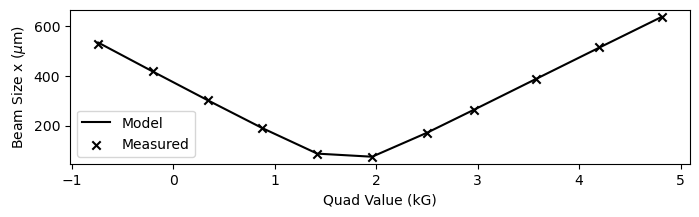

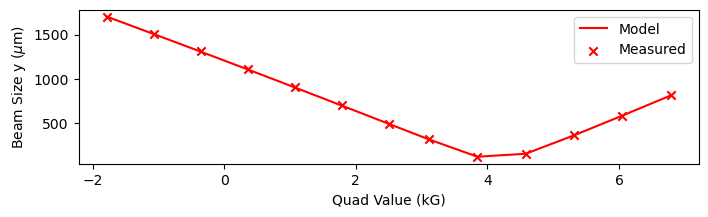

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.73960641, -0.19967201,  0.34026239,  0.8801968 ,  1.4201312 ,
         1.9600656 ,  2.5       ,  2.96280092,  3.5798688 ,  4.19693669,
         4.81400458]),
 'beamsizesx': array([5.28712123e-04, 4.18424353e-04, 3.03907649e-04, 1.89361776e-04,
        8.72521296e-05, 7.47769578e-05, 1.70779033e-04, 2.64677422e-04,
        3.87286915e-04, 5.15800077e-04, 6.38512189e-04]),
 'beamsizeserrx': array([0.03076948, 0.02092723, 0.01228299, 0.00558799, 0.00200568,
        0.00142784, 0.00526443, 0.0092944 , 0.02147278, 0.028475  ,
        0.0365543 ]),
 'error_x': False,
 'emit_x': 6.464223764495999e-09,
 'norm_emit_x': 1.0119929824549373e-06,
 'beta_x': 9.868754173843689,
 'alpha_x': -1.974241847398143,
 'emit_x_err': 1.8648735083179982e-07,
 'norm_emit_x_err': 2.9195135755500527e-05,
 'beta_x_rel_err': 28.84914842460435,
 'alpha_x_rel_err': -1.8251980418696596e-15,
 'sigma_11': 6.379383525652945e-08,
 'sigma_12': 1.2761941066813558e-08,
 'sigma_22': 3.2080424048395876e-

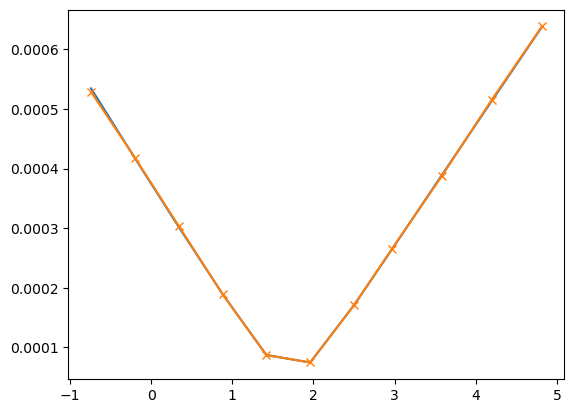

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

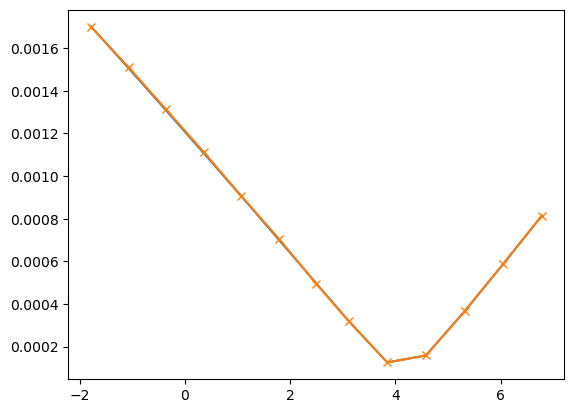

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


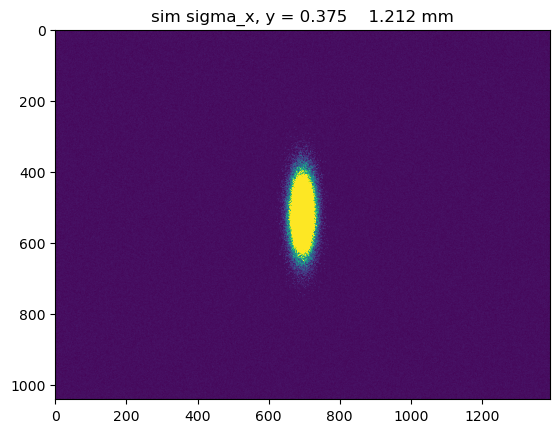

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)